### cs231n case study toy NN example

http://cs231n.github.io/neural-networks-case-study/

In [154]:
import numpy as np
# for quick visualization in notebook
import matplotlib.pyplot as plt
%matplotlib inline

(-1, 1)

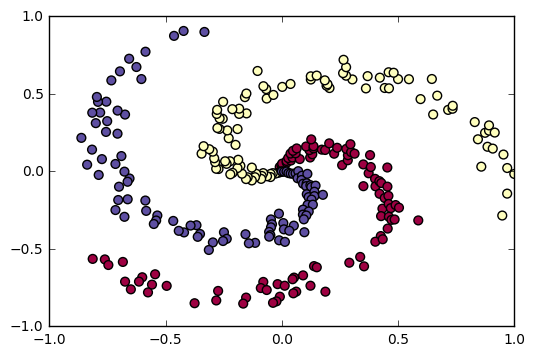

In [156]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [3]:
print np.c_.__doc__


    Translates slice objects to concatenation along the second axis.

    This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
    useful because of its common occurrence. In particular, arrays will be
    stacked along their last axis after being upgraded to at least 2-D with
    1's post-pended to the shape (column vectors made out of 1-D arrays).

    For detailed documentation, see `r_`.

    Examples
    --------
    >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    array([[1, 2, 3, 0, 0, 4, 5, 6]])

    


### Training a softmax linear classifier

In [157]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
num_examples = N*K

In [158]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [159]:
print(scores.shape)
print(scores[50])

(300L, 3L)
[ 0.00245413  0.00319615  0.01122212]


##### Softmax loss using cross-entropy

> keepdims variable forces the matrix shape !! 
- else np.sum results in a 1D vector that gives shape error in / operation with 300x3 matrix exp_scores !!!

In [160]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

In [161]:
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   

In [162]:
print(probs.shape)
print(probs[50])
print(range(4))

(300L, 3L)
[ 0.33227572  0.33252236  0.33520192]
[0, 1, 2, 3]


We now have an array probs of size [300 x 3], where each row now contains the class probabilities. In particular, since we’ve normalized them every row now sums to one. We can now query for the log probabilities assigned to the correct classes in each example:


$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right)$

In [163]:
correct_logprobs = -np.log(probs[range(N*K),y])
print(correct_logprobs.shape)

(300L,)


In [164]:
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss
print(loss)

1.1000324293


Evaluating this in the beginning (with random parameters) might give us loss = 1.1, which is np.log(1.0/3), since with small initial random weights all probabilities assigned to all classes are about one third. We now want to make the loss as low as possible, with loss = 0 as the absolute lower bound. But the lower the loss is, the higher are the probabilities assigned to the correct classes for all examples.

##### Lets optimize the loss by computing the gradient

$\frac{\partial L_i }{ \partial f_k } = p_k - \mathbb{1}(y_i = k)$

In [165]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples
print(dscores.shape)

(300L, 3L)


In [166]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

##### Lets update parameters

In [167]:
# perform a parameter update
W += -step_size * dW
b += -step_size * db

#### Full code

In [168]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.097984
iteration 10: loss 0.914151
iteration 20: loss 0.846413
iteration 30: loss 0.815853
iteration 40: loss 0.800058
iteration 50: loss 0.791129
iteration 60: loss 0.785761
iteration 70: loss 0.782388
iteration 80: loss 0.780197
iteration 90: loss 0.778738
iteration 100: loss 0.777747
iteration 110: loss 0.777064
iteration 120: loss 0.776586
iteration 130: loss 0.776250
iteration 140: loss 0.776010
iteration 150: loss 0.775839
iteration 160: loss 0.775715
iteration 170: loss 0.775626
iteration 180: loss 0.775561
iteration 190: loss 0.775514


##### Training set accuracy

In [169]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.52


(-1.8526889129801827, 1.8873110870198206)

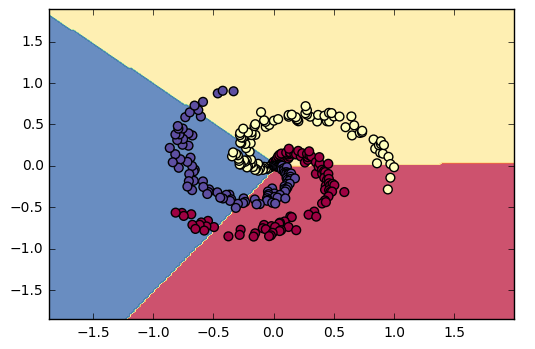

In [170]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

### Training a 1-layer neural network

In [171]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [172]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [173]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [174]:
dhidden = np.dot(dscores, W2.T)

In [175]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

##### Full code

In [176]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098771
iteration 1000: loss 0.294895
iteration 2000: loss 0.263911
iteration 3000: loss 0.249126
iteration 4000: loss 0.245689
iteration 5000: loss 0.244790
iteration 6000: loss 0.244345
iteration 7000: loss 0.244205
iteration 8000: loss 0.244158
iteration 9000: loss 0.244133


In [177]:
print(predicted_class.shape)

(300L,)


In [178]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.99


In [179]:
# write forward pass into predict function
def predict(X):
    """ 
    Input: X is matrix of NxD with N samples each of dimension D
    Output: predicted_class is vector of length N (1 prediction per sample)
    """
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    return predicted_class

##### plot the decision boundaries

In [180]:
# find arg across k where scores is max
Z = np.argmax(scores, axis=1) # class predictions 0,1,2
print(Z.shape, Z.size, Z[idx])

((300L,), 300, 2)


(-1.893657395474134, 1.8063426045258693)

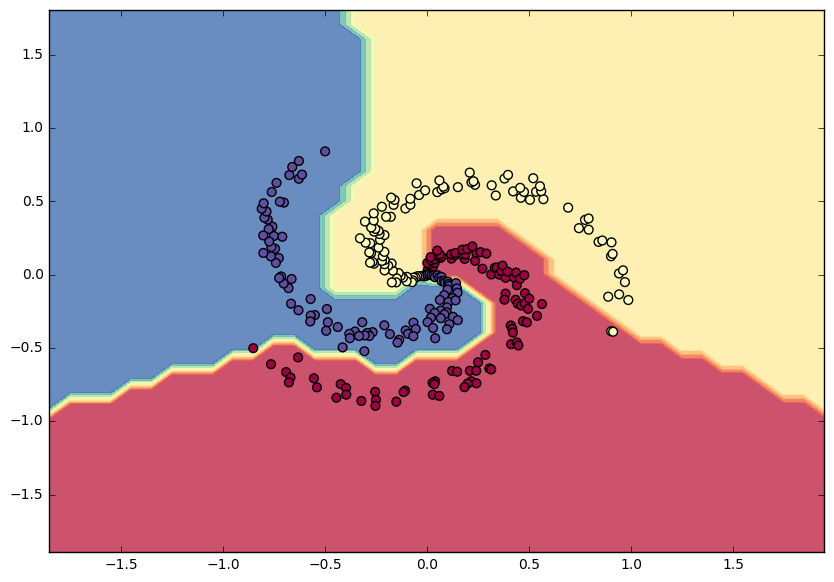

In [183]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
fig = plt.figure()
fig.set_size_inches(10,7)
       
# Put the probability scores into a color plot with training samples on it
# Plotting decision regions
h=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
# plot training samples
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#fig.savefig('spiral_net.png')